# Обучение с учителем

Изучим отток клиентов (churn) для провайдера интерент услуг и телефонаии.
1. Проведем исследование данных (exploratory data analysis - EDA)
2. Когортный анализ оттока клиентов (churn cohort analysis). Когда клиент перестает пользоваться услугами компании.
3. Предиктивное машинное обучение. На основе признаков определим, что с высокой вероятностью клиент уйдет в отток.

In [103]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

In [104]:
df = pd.read_csv(r"C:\Users\mmd28\OneDrive\Рабочий стол\Academic potfolio\Classical Machine Learning\Supervised learning\Classification\data\Telco-Customer-Churn.csv")

In [105]:
df.head(3)

customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   

  TechSupport StreamingTV StreamingMovies        Contract PaperlessBilling  \
0          No          No              No  Month-to-month              Yes   
1          No          No              No        One year               No   
2          No          No              No  Month-to-month              Yes   

      PaymentMethod MonthlyCharges  TotalCharges  Churn  
0  Electronic check          29.85         29.85     No  
1      Mailed check          56.95       1889.50     No  
2      Mailed check          53.85        108.15    Yes  

[3 rows x 21 columns]

Наша целевая переменная - колонка Churn

Посмотрим на основные характеристики датафрейма. Проверим типы данных для колонок и наличие отсутствующих значений.

In [106]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7032 entries, 0 to 7031
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7032 non-null   object 
 1   gender            7032 non-null   object 
 2   SeniorCitizen     7032 non-null   int64  
 3   Partner           7032 non-null   object 
 4   Dependents        7032 non-null   object 
 5   tenure            7032 non-null   int64  
 6   PhoneService      7032 non-null   object 
 7   MultipleLines     7032 non-null   object 
 8   InternetService   7032 non-null   object 
 9   OnlineSecurity    7032 non-null   object 
 10  OnlineBackup      7032 non-null   object 
 11  DeviceProtection  7032 non-null   object 
 12  TechSupport       7032 non-null   object 
 13  StreamingTV       7032 non-null   object 
 14  StreamingMovies   7032 non-null   object 
 15  Contract          7032 non-null   object 
 16  PaperlessBilling  7032 non-null   object 


В датафрейме во всех колонках 7032 строки и нет отсутствующих значений. Большая часть колонок object, а значит нам нужно будет создать дамми переменные для текстовых значений.

Посмотрим на основные характеристики числовых колонок.

In [107]:
df.describe()

SeniorCitizen       tenure  MonthlyCharges  TotalCharges
count    7032.000000  7032.000000     7032.000000   7032.000000
mean        0.162400    32.421786       64.798208   2283.300441
std         0.368844    24.545260       30.085974   2266.771362
min         0.000000     1.000000       18.250000     18.800000
25%         0.000000     9.000000       35.587500    401.450000
50%         0.000000    29.000000       70.350000   1397.475000
75%         0.000000    55.000000       89.862500   3794.737500
max         1.000000    72.000000      118.750000   8684.800000

Колонка SeniorCitizen имеет значения от 0 до 1. Вероятно она принимает только 2 значения 0 и 1 - это категориальная переменная. А другие колонки имеют непрерывные значения. 

tenure - сколько месяцев человек является абонентомБ от 1 до 72. 

Убедимся, что в наших данных нет отсутствующих значений.

In [108]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

Посмотрим на сбаллансированность целевой переменной Churn

<Axes: xlabel='Churn', ylabel='count'>

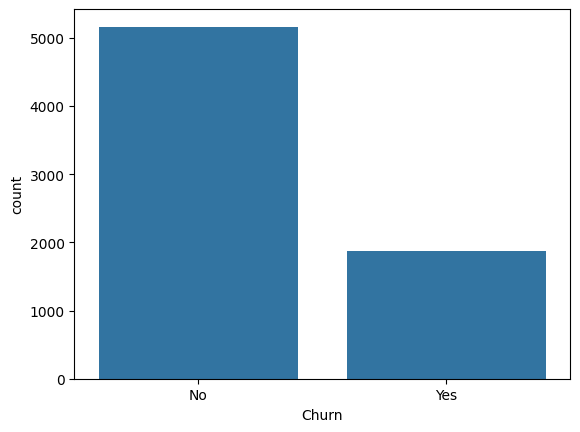

In [109]:
sns.countplot(data=df, x='Churn')

In [110]:
df['Churn'].value_counts()

Churn
No     5163
Yes    1869
Name: count, dtype: int64

Данные не сбаллансированы. Но это соотношение небольшое.

Посмотрим распределение данных в колонке TotalCharges по раздичных категориям Churn

<Axes: xlabel='Churn', ylabel='TotalCharges'>

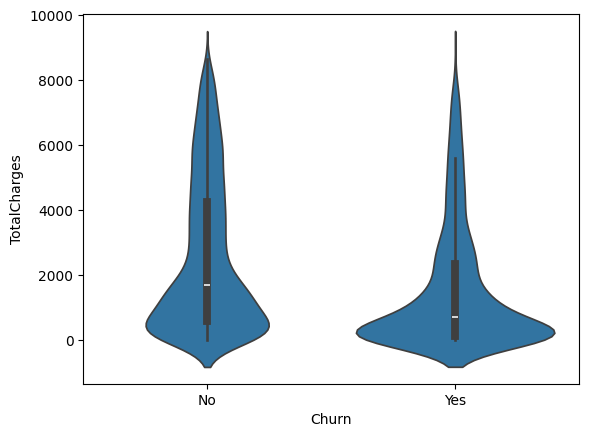

In [111]:
sns.violinplot(data=df, x='Churn', y='TotalCharges')

<Axes: xlabel='Churn', ylabel='TotalCharges'>

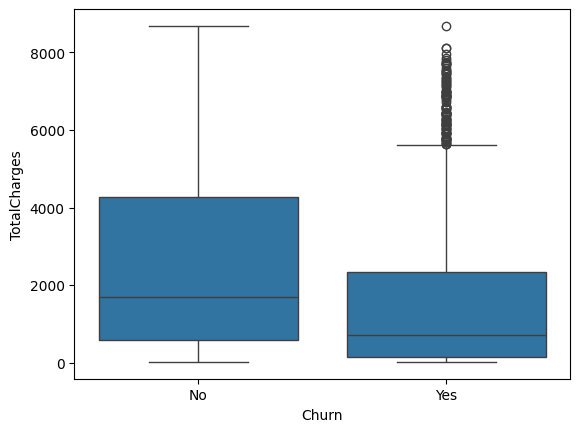

In [112]:
sns.boxplot(data=df, x='Churn', y='TotalCharges')

Построим график распределения колонки TotalCharges для различных типов контрактов. Раскрасим цвета по колонке Churn

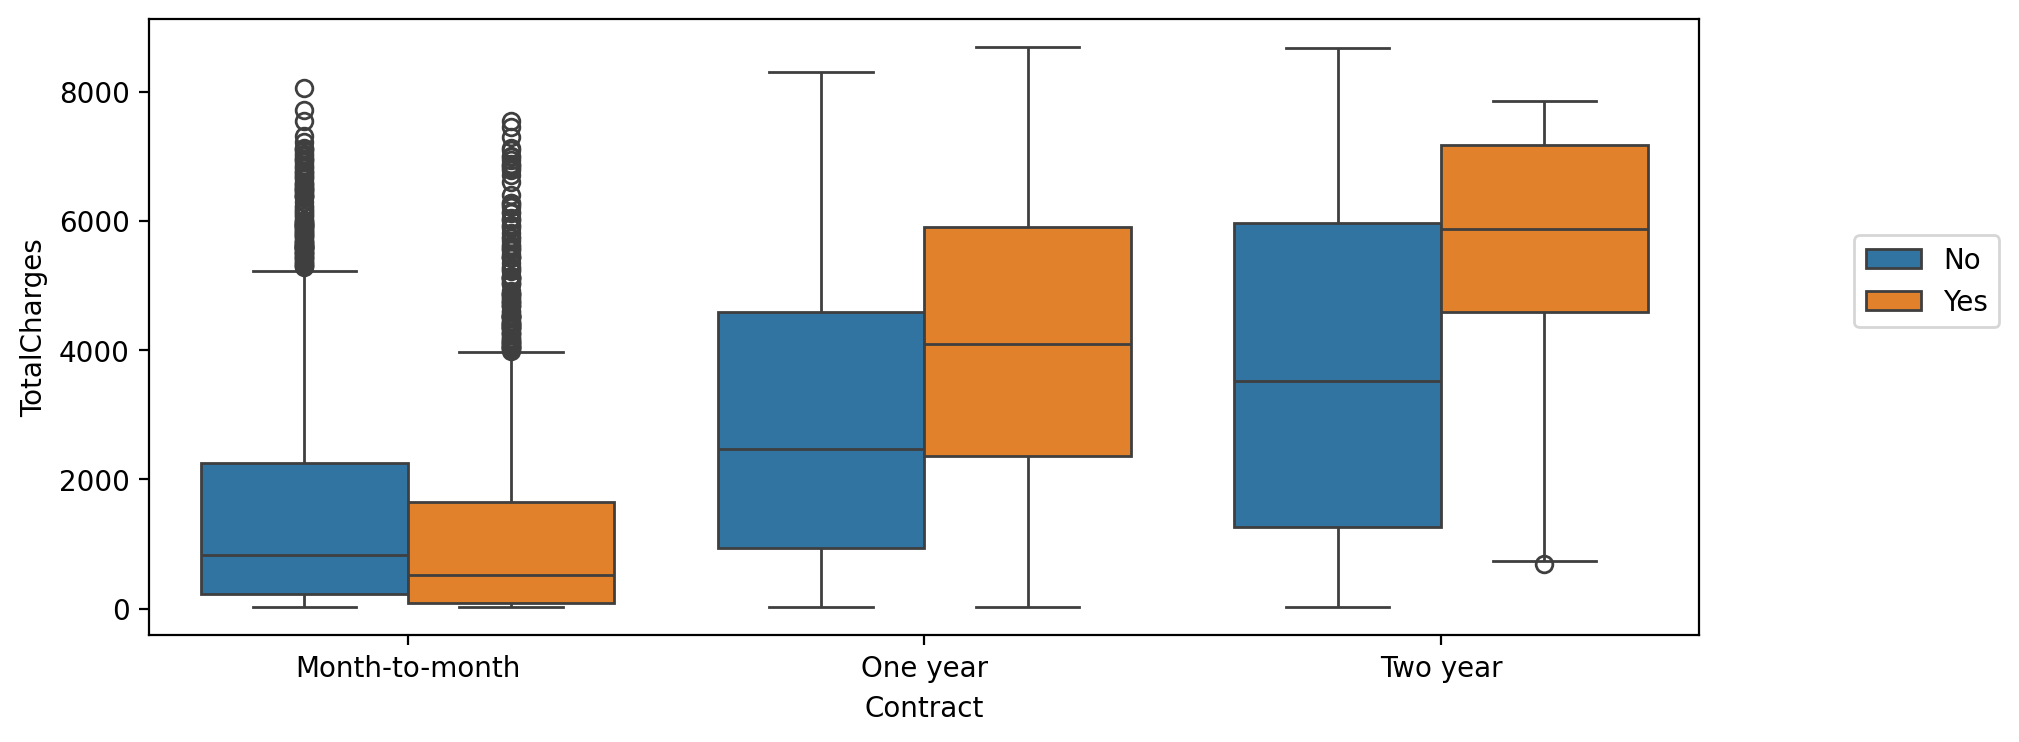

In [113]:
plt.figure(figsize=(10, 4), dpi=200)
sns.boxplot(data=df, y='TotalCharges', x='Contract', hue='Churn')
plt.legend(loc=(1.1, 0.5))

Если мы посмотрим на тип контракта Month-to-month, то количество Churn = Yes и Churn=No практически одинаково. Так же для типа контракта One year Contract. Для двухлетних контрактов мы видим меньшее количество людей, уходящих в отток.

Что может сделать компания для уменьшения оттока в месяц и в год? Для контрактов в месяц люди могли заранее решить, что будут пользрваться услушами не долго.

В годовых контрактах отток больше всего. Мы рассмтаривали колонку TotalCharges и можем сделать вывод, что в отток уходят те, кто платит больше, как и в двухлетнем варианте. Либо их не устраивает качество услуг, либо они уходят к конкурентам за более выгодными предложениями.

Построим график корреляции отдельных признаков с целевой переменной. для этого мы должны категориальные переменные преобразовать в дамми переменные.

In [114]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [115]:
pd.get_dummies(df[['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
                   'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'InternetService', 
                   'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn']])

SeniorCitizen  gender_Female  gender_Male  Partner_No  Partner_Yes  \
0                 0           True        False       False         True   
1                 0          False         True        True        False   
2                 0          False         True        True        False   
3                 0          False         True        True        False   
4                 0           True        False        True        False   
...             ...            ...          ...         ...          ...   
7027              0          False         True       False         True   
7028              0           True        False       False         True   
7029              0           True        False       False         True   
7030              1          False         True       False         True   
7031              0          False         True        True        False   

      Dependents_No  Dependents_Yes  PhoneService_No  PhoneService_Yes  \
0              True           False             True             False   
1              True           False            False              True   
2              True           False            False              True   
3              True           False             True             False   
4              True           False            False              True   
...             ...             ...              ...               ...   
7027          False            True            False              True   
7028          False            True            False              True   
7029          False            True             True             False   
7030           True           False            False              True   
7031           True           False            False              True   

      MultipleLines_No  ...  Contract_One year  Contract_Two year  \
0                False  ...              False              False   
1                 True  ...               True              False   
2                 True  ...              False              False   
3                False  ...               True              False   
4                 True  ...              False              False   
...                ...  ...                ...                ...   
7027             False  ...               True              False   
7028             False  ...               True              False   
7029             False  ...              False              False   
7030             False  ...              False              False   
7031              True  ...              False               True   

      PaperlessBilling_No  PaperlessBilling_Yes  \
0                   False                  True   
1                    True                 False   
2                   False                  True   
3                    True                 False   
4                   False                  True   
...                   ...                   ...   
7027                False                  True   
7028                False                  True   
7029                False                  True   
7030                False                  True   
7031                False                  True   

      PaymentMethod_Bank transfer (automatic)  \
0                                       False   
1                                       False   
2                                       False   
3                                        True   
4                                       False   
...                                       ...   
7027                                    False   
7028                                    False   
7029                                    False   
7030                                    False   
7031                                     True   

      PaymentMethod_Credit card (automatic)  PaymentMethod_Electronic check  \
0                                     False                            True   
1              

Для графика и сравнения мы не будем удалять дублирующиеся колонки, которые образовались при преобразовании дамми переменных. Но в будущем мы их удалим drop_first = True, для избежания мультиколлениарности признаков.

Поскольку нам интересны данные оттока, мы можем оставить только Churn_Yes.

In [116]:
corr_df = pd.get_dummies(df[['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
                   'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'InternetService', 
                   'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn']]).corr()

Выведем сортированные данные корреляции и удалим строки Churn_No и Churn_Yes. 

In [117]:
corr_df['Churn_Yes'].sort_values().iloc[1: -1]

Contract_Two year                         -0.301552
OnlineSecurity_No internet service        -0.227578
TechSupport_No internet service           -0.227578
InternetService_No                        -0.227578
OnlineBackup_No internet service          -0.227578
StreamingMovies_No internet service       -0.227578
StreamingTV_No internet service           -0.227578
DeviceProtection_No internet service      -0.227578
PaperlessBilling_No                       -0.191454
Contract_One year                         -0.178225
OnlineSecurity_Yes                        -0.171270
TechSupport_Yes                           -0.164716
Dependents_Yes                            -0.163128
Partner_Yes                               -0.149982
PaymentMethod_Credit card (automatic)     -0.134687
InternetService_DSL                       -0.124141
PaymentMethod_Bank transfer (automatic)   -0.118136
PaymentMethod_Mailed check                -0.090773
OnlineBackup_Yes                          -0.082307
DeviceProtec

In [118]:
corr_yes_churn = corr_df['Churn_Yes'].sort_values().iloc[1: -1]

Визуализируем данные

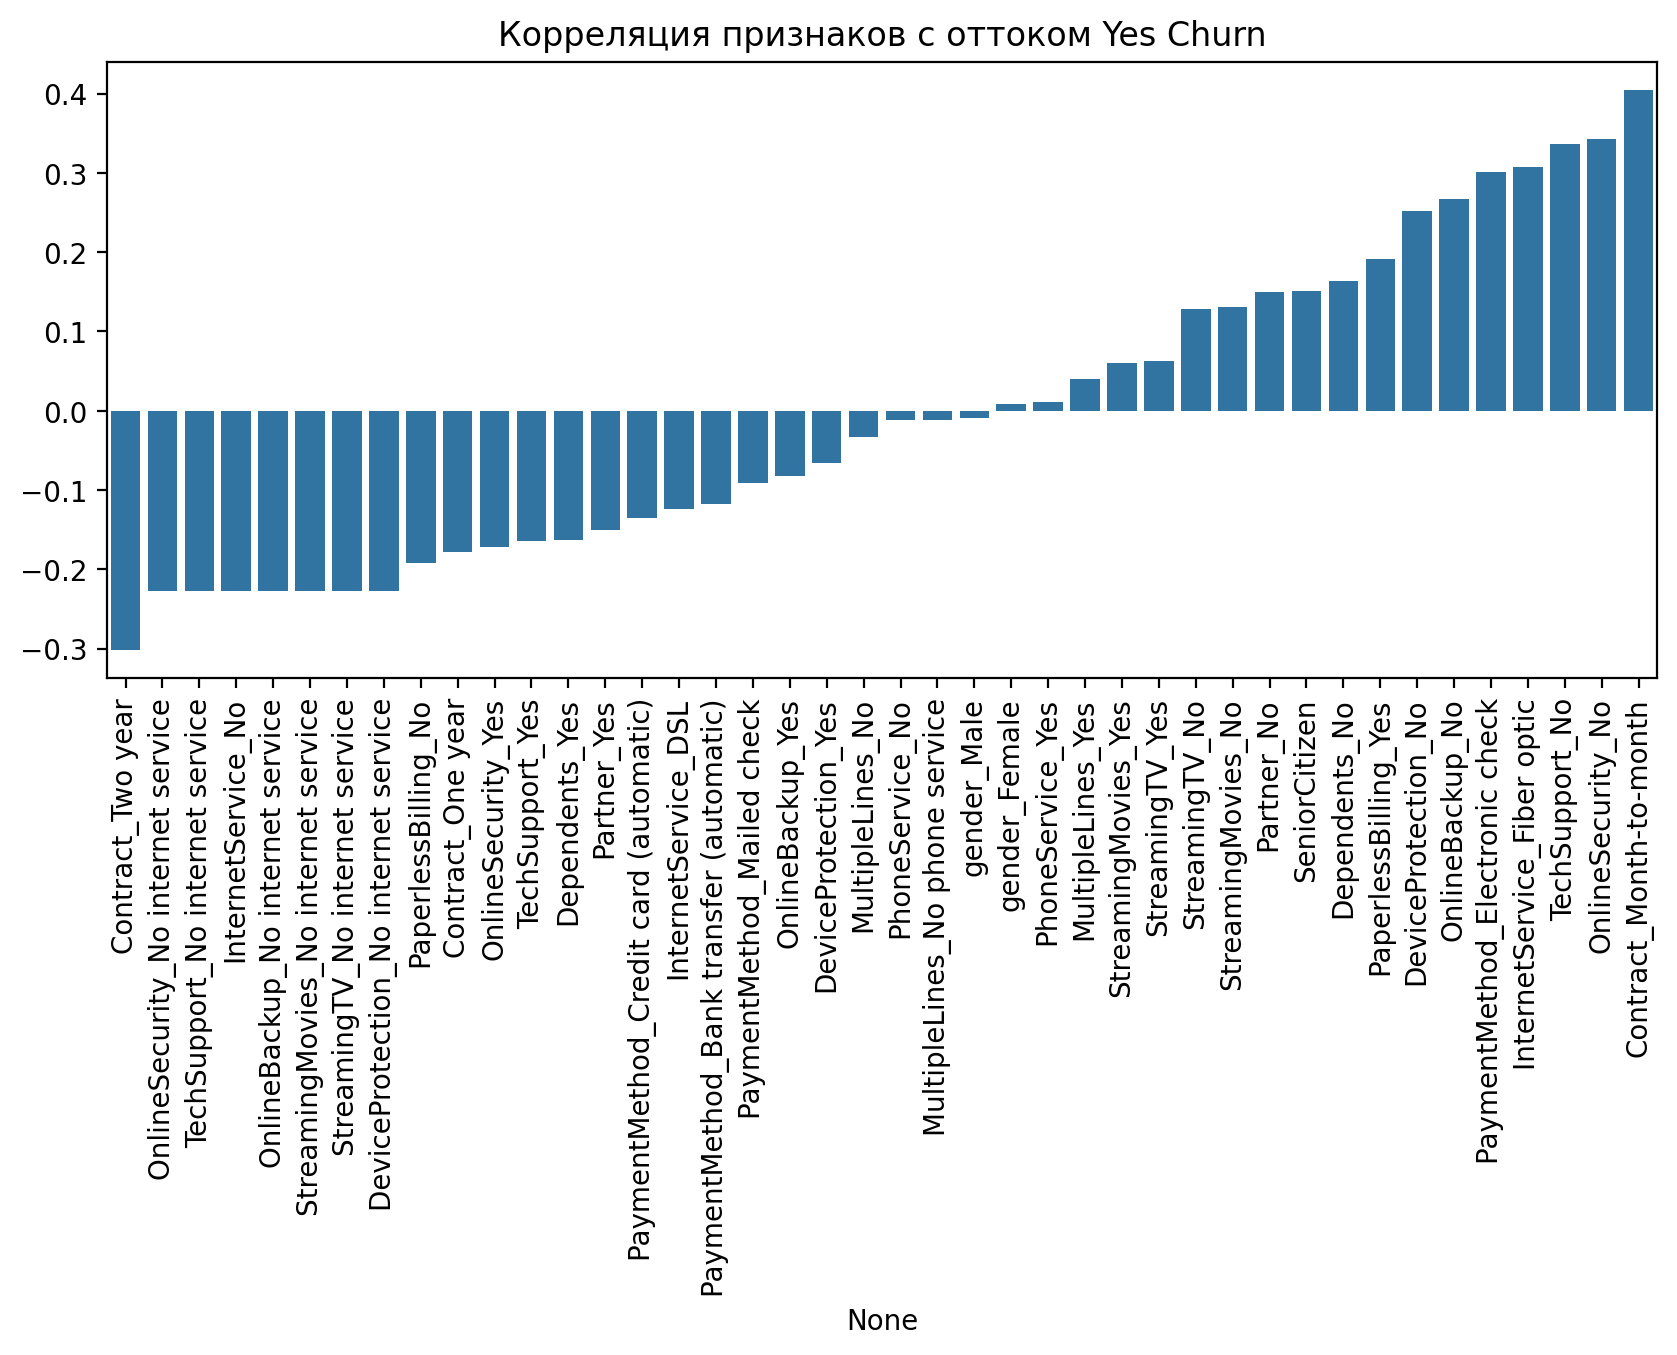

In [119]:
plt.figure(figsize=(10, 4), dpi=200)
plt.title('Корреляция признаков с оттоком Yes Churn')
sns.barplot(x=corr_yes_churn.index, y=corr_yes_churn.values)
plt.xticks(rotation=90);

**Проведем когортный анализ и анализ оттока**

Разобьем всех абонентов на сегменты по длительности обслуживания, что бы понять поведение абонента в зависимости от длительности обслуживания. 

Создадим гистограмму с распределением значений колонки tenure - это количество месяцев, сколько времени человек являлся или является абонентом компании. 

In [120]:
df['Contract'].unique()

array(['Month-to-month', 'One year', 'Two year'], dtype=object)

In [121]:
# Посмотрим, сколько месяцев человек является абонентом компании
df['tenure'].unique()

array([ 1, 34,  2, 45,  8, 22, 10, 28, 62, 13, 16, 58, 49, 25, 69, 52, 71,
       21, 12, 30, 47, 72, 17, 27,  5, 46, 11, 70, 63, 43, 15, 60, 18, 66,
        9,  3, 31, 50, 64, 56,  7, 42, 35, 48, 29, 65, 38, 68, 32, 55, 37,
       36, 41,  6,  4, 33, 67, 23, 57, 61, 14, 20, 53, 40, 59, 24, 44, 19,
       54, 51, 26, 39])

<Axes: xlabel='tenure', ylabel='Count'>

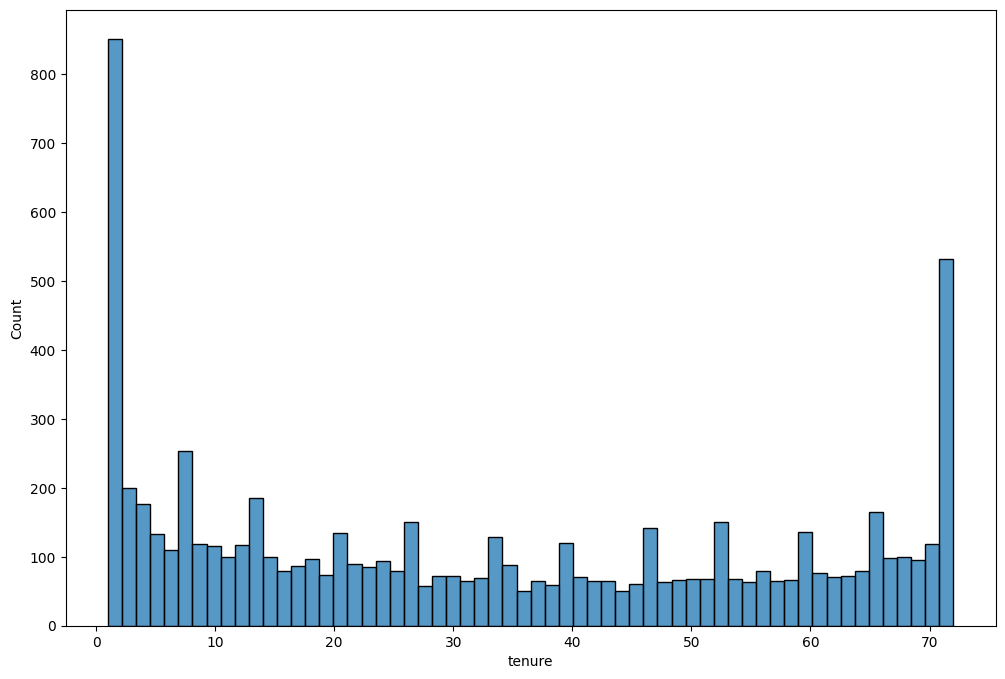

In [122]:
plt.figure(figsize=(12, 8))
sns.histplot(data=df, x='tenure', bins=60)

Проанализируем распределение данных в разрезе типов контрактов и оттока

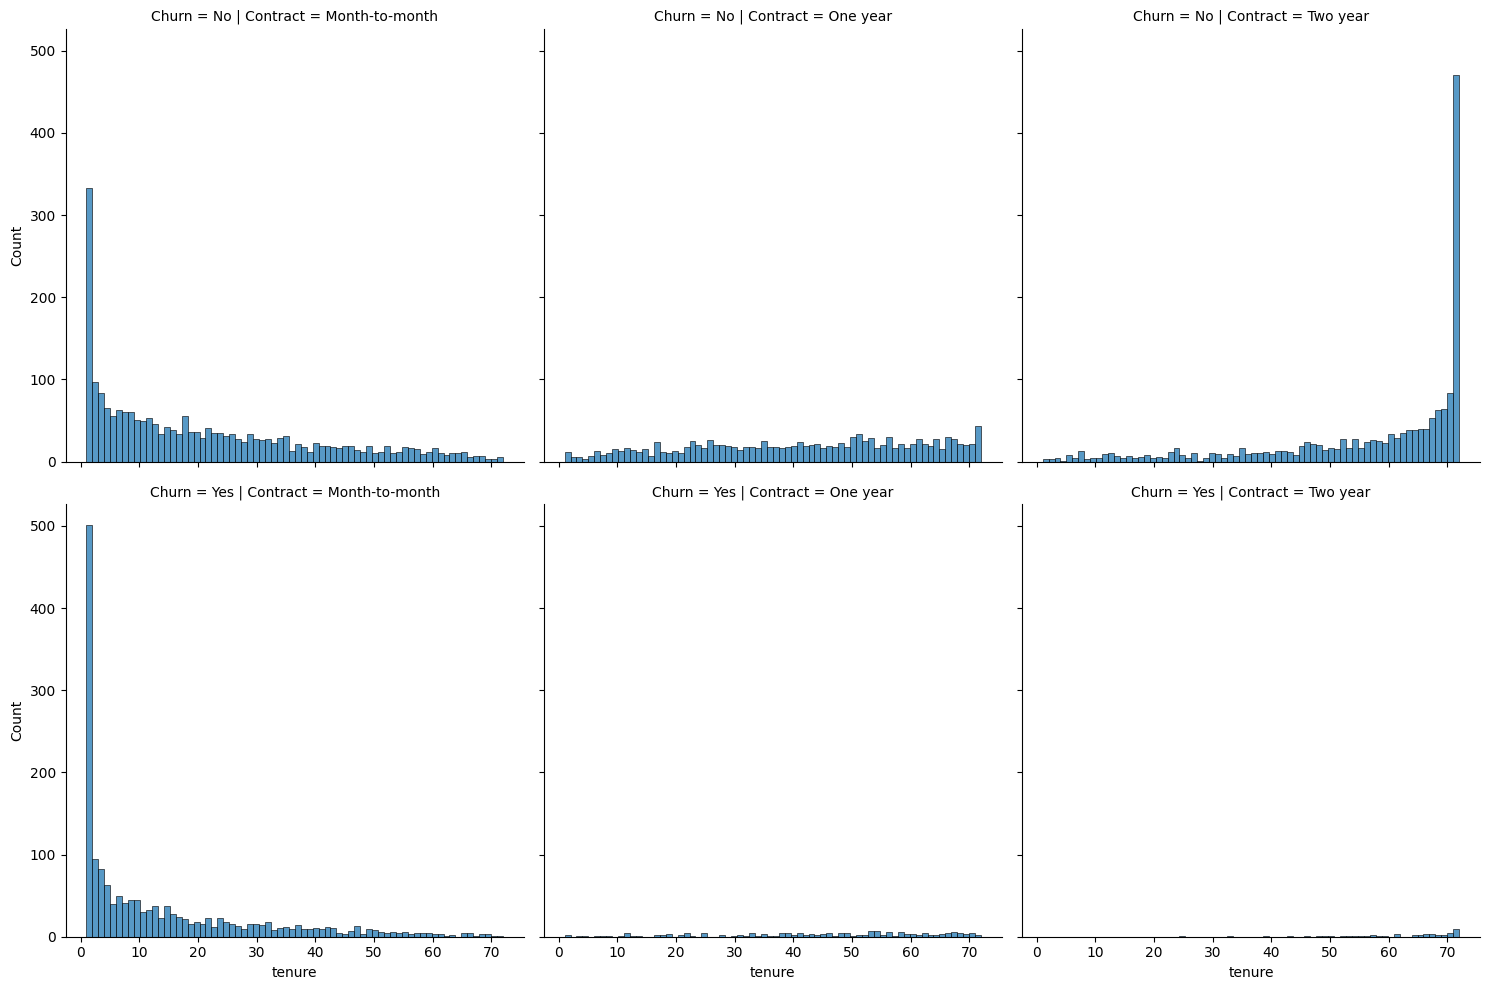

In [123]:
sns.displot(data=df, x='tenure', bins=70, col='Contract', row='Churn')

Мы видим, что наибольший отток находится в колонке Month-to-month.

Построим график для колонок Total Charges и Monthly Charges. Раскрасим график цветом по колонке Churn

<Axes: xlabel='MonthlyCharges', ylabel='TotalCharges'>

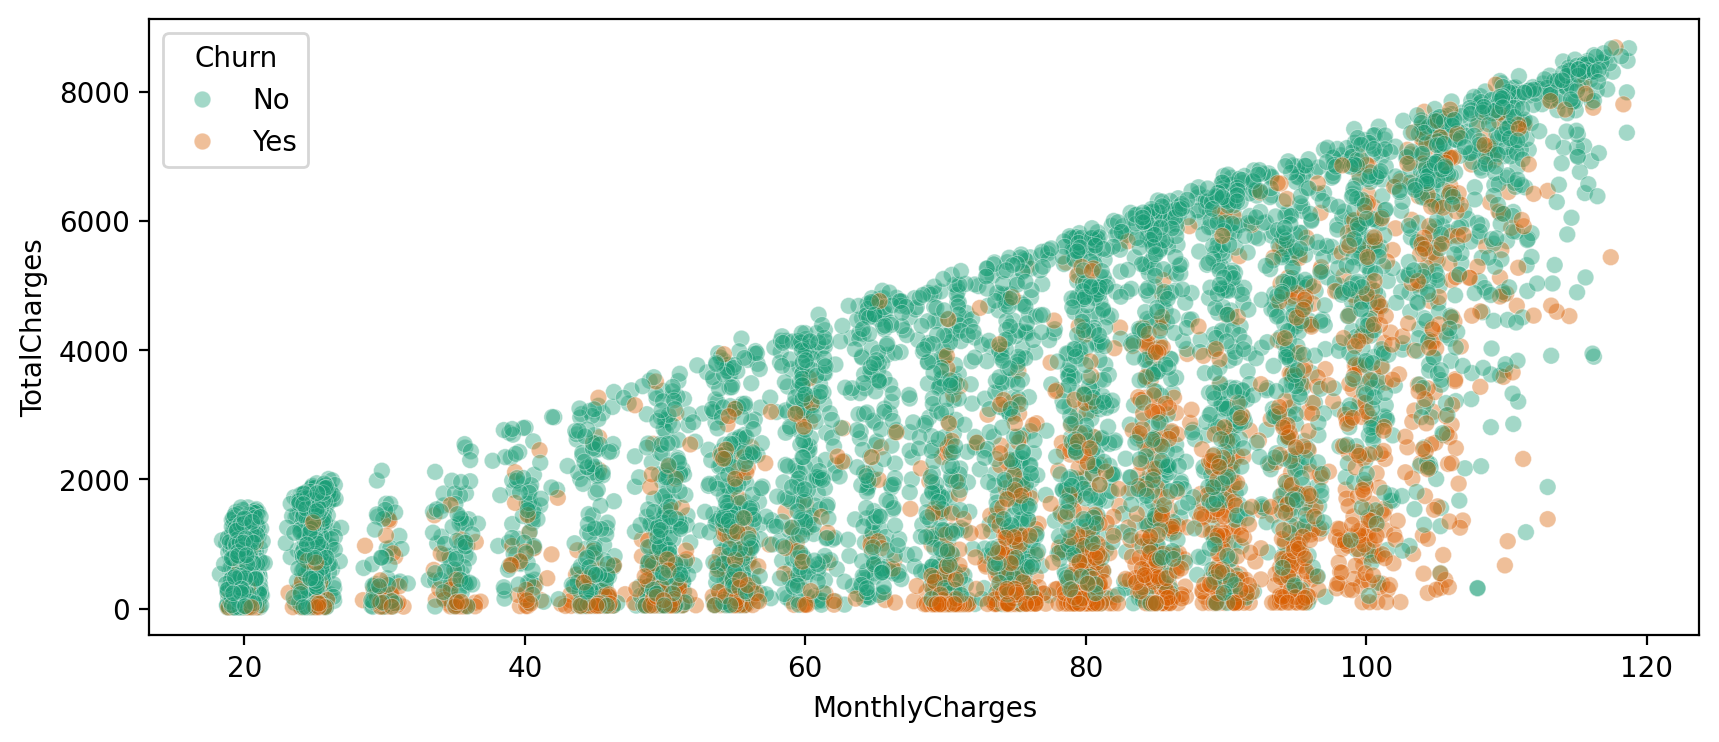

In [124]:
plt.figure(figsize=(10, 4), dpi=200)
sns.scatterplot(data=df, x='MonthlyCharges', y='TotalCharges', hue='Churn', 
                alpha=0.4, lw=0.3, palette='Dark2')

мы видим, что в отток уходят те, у кого больше ежемесяцные расходы

**Создадим когорты (сегменты) по колонке Tenure**

Поместим различные значения Tenure (1 месяц, 2 месяца и т.д.) в отдельные когорты (сегменты). Затем для каждого уникального значения колонки Tenure вычислим проценты оттока от общего количества людей в данной когорте. 

In [125]:
# Посмотрим отдельно тех, кто ушел в отток
df.groupby(['Churn', 'tenure']).count()

customerID  gender  SeniorCitizen  Partner  Dependents  \
Churn tenure                                                           
No    1              233     233            233      233         233   
      2              115     115            115      115         115   
      3              106     106            106      106         106   
      4               93      93             93       93          93   
      5               69      69             69       69          69   
...                  ...     ...            ...      ...         ...   
Yes   68               9       9              9        9           9   
      69               8       8              8        8           8   
      70              11      11             11       11          11   
      71               6       6              6        6           6   
      72               6       6              6        6           6   

              PhoneService  MultipleLines  InternetService  OnlineSecurity  \
Churn tenure                                                                 
No    1                233            233              233             233   
      2                115            115              115             115   
      3                106            106              106             106   
      4                 93             93               93              93   
      5                 69             69               69              69   
...                    ...            ...              ...             ...   
Yes   68                 9              9                9               9   
      69                 8              8                8               8   
      70                11             11               11              11   
      71                 6              6                6               6   
      72                 6              6                6               6   

              OnlineBackup  DeviceProtection  TechSupport  StreamingTV  \
Churn tenure                                                             
No    1                233               233          233          233   
      2                115               115          115          115   
      3                106               106          106          106   
      4                 93                93           93           93   
      5                 69                69           69           69   
...                    ...               ...          ...          ...   
Yes   68                 9                 9            9            9   
      69                 8                 8            8            8   
      70                11                11           11           11   
      71                 6                 6            6            6   
      72                 6                 6            6            6   

              StreamingMovies  Contract  PaperlessBilling  PaymentMethod  \
Churn tenure                                                               
No    1                   233       233               233            233   
      2                   115       115               115            115   
      3                   106       106               106            106   
      4                    93        93                93             93   
      5                    69        69                69             69   
...                       ...       ...               ...            ...   
Yes   68                    9         9                 9              9   
      69                    8         8                 8              8   
      70                   11        11                11             11   
      71                    6         6                 6              6   
      72                    6         6                 6              6   

              MonthlyCharges  TotalCharges  
Churn tenure                                
No    1             

In [126]:
df.groupby(['Churn', 'tenure']).count().transpose()['Yes']

tenure             1    2   3   4   5   6   7   8   9   10  ...  63  64  65  \
customerID        380  123  94  83  64  40  51  42  46  45  ...   4   4   9   
gender            380  123  94  83  64  40  51  42  46  45  ...   4   4   9   
SeniorCitizen     380  123  94  83  64  40  51  42  46  45  ...   4   4   9   
Partner           380  123  94  83  64  40  51  42  46  45  ...   4   4   9   
Dependents        380  123  94  83  64  40  51  42  46  45  ...   4   4   9   
PhoneService      380  123  94  83  64  40  51  42  46  45  ...   4   4   9   
MultipleLines     380  123  94  83  64  40  51  42  46  45  ...   4   4   9   
InternetService   380  123  94  83  64  40  51  42  46  45  ...   4   4   9   
OnlineSecurity    380  123  94  83  64  40  51  42  46  45  ...   4   4   9   
OnlineBackup      380  123  94  83  64  40  51  42  46  45  ...   4   4   9   
DeviceProtection  380  123  94  83  64  40  51  42  46  45  ...   4   4   9   
TechSupport       380  123  94  83  64  40  51  42  46  45  ...   4   4   9   
StreamingTV       380  123  94  83  64  40  51  42  46  45  ...   4   4   9   
StreamingMovies   380  123  94  83  64  40  51  42  46  45  ...   4   4   9   
Contract          380  123  94  83  64  40  51  42  46  45  ...   4   4   9   
PaperlessBilling  380  123  94  83  64  40  51  42  46  45  ...   4   4   9   
PaymentMethod     380  123  94  83  64  40  51  42  46  45  ...   4   4   9   
MonthlyCharges    380  123  94  83  64  40  51  42  46  45  ...   4   4   9   
TotalCharges      380  123  94  83  64  40  51  42  46  45  ...   4   4   9   

tenure            66  67  68  69  70  71  72  
customerID        13  10   9   8  11   6   6  
gender            13  10   9   8  11   6   6  
SeniorCitizen     13  10   9   8  11   6   6  
Partner           13  10   9   8  11   6   6  
Dependents        13  10   9   8  11   6   6  
PhoneService      13  10   9   8  11   6   6  
MultipleLines     13  10   9   8  11   6   6  
InternetService   13  10   9   8  11   6   6  
OnlineSecurity    13  10   9   8  11   6   6  
OnlineBackup      13  10   9   8  11   6   6  
DeviceProtection  13  10   9   8  11   6   6  
TechSupport       13  10   9   8  11   6   6  
StreamingTV       13  10   9   8  11   6   6  
StreamingMovies   13  10   9   8  11   6   6  
Contract          13  10   9   8  11   6   6  
PaperlessBilling  13  10   9   8  11   6   6  
PaymentMethod     13  10   9   8  11   6   6  
MonthlyCharges    13  10   9   8  11   6   6  
TotalCharges      13  10   9   8  11   6   6  

[19 rows x 72 columns]

In [127]:
yes_churn = df.groupby(['Churn', 'tenure']).count().transpose()['Yes']

In [128]:
# Посмотрим отдельно тех, кто Не ушел в отток
df.groupby(['Churn', 'tenure']).count().transpose()['No']

tenure             1    2    3   4   5   6   7   8   9   10  ...  63  64  65  \
customerID        233  115  106  93  69  70  80  81  73  71  ...  68  76  67   
gender            233  115  106  93  69  70  80  81  73  71  ...  68  76  67   
SeniorCitizen     233  115  106  93  69  70  80  81  73  71  ...  68  76  67   
Partner           233  115  106  93  69  70  80  81  73  71  ...  68  76  67   
Dependents        233  115  106  93  69  70  80  81  73  71  ...  68  76  67   
PhoneService      233  115  106  93  69  70  80  81  73  71  ...  68  76  67   
MultipleLines     233  115  106  93  69  70  80  81  73  71  ...  68  76  67   
InternetService   233  115  106  93  69  70  80  81  73  71  ...  68  76  67   
OnlineSecurity    233  115  106  93  69  70  80  81  73  71  ...  68  76  67   
OnlineBackup      233  115  106  93  69  70  80  81  73  71  ...  68  76  67   
DeviceProtection  233  115  106  93  69  70  80  81  73  71  ...  68  76  67   
TechSupport       233  115  106  93  69  70  80  81  73  71  ...  68  76  67   
StreamingTV       233  115  106  93  69  70  80  81  73  71  ...  68  76  67   
StreamingMovies   233  115  106  93  69  70  80  81  73  71  ...  68  76  67   
Contract          233  115  106  93  69  70  80  81  73  71  ...  68  76  67   
PaperlessBilling  233  115  106  93  69  70  80  81  73  71  ...  68  76  67   
PaymentMethod     233  115  106  93  69  70  80  81  73  71  ...  68  76  67   
MonthlyCharges    233  115  106  93  69  70  80  81  73  71  ...  68  76  67   
TotalCharges      233  115  106  93  69  70  80  81  73  71  ...  68  76  67   

tenure            66  67  68  69   70   71   72  
customerID        76  88  91  87  108  164  356  
gender            76  88  91  87  108  164  356  
SeniorCitizen     76  88  91  87  108  164  356  
Partner           76  88  91  87  108  164  356  
Dependents        76  88  91  87  108  164  356  
PhoneService      76  88  91  87  108  164  356  
MultipleLines     76  88  91  87  108  164  356  
InternetService   76  88  91  87  108  164  356  
OnlineSecurity    76  88  91  87  108  164  356  
OnlineBackup      76  88  91  87  108  164  356  
DeviceProtection  76  88  91  87  108  164  356  
TechSupport       76  88  91  87  108  164  356  
StreamingTV       76  88  91  87  108  164  356  
StreamingMovies   76  88  91  87  108  164  356  
Contract          76  88  91  87  108  164  356  
PaperlessBilling  76  88  91  87  108  164  356  
PaymentMethod     76  88  91  87  108  164  356  
MonthlyCharges    76  88  91  87  108  164  356  
TotalCharges      76  88  91  87  108  164  356  

[19 rows x 72 columns]

In [129]:
no_churn = df.groupby(['Churn', 'tenure']).count().transpose()['No']

Посчитаем проценты

In [130]:
churn_rate = 100 * yes_churn / (no_churn + yes_churn)

In [131]:
churn_rate

tenure                   1          2     3          4          5          6   \
customerID        61.990212  51.680672  47.0  47.159091  48.120301  36.363636   
gender            61.990212  51.680672  47.0  47.159091  48.120301  36.363636   
SeniorCitizen     61.990212  51.680672  47.0  47.159091  48.120301  36.363636   
Partner           61.990212  51.680672  47.0  47.159091  48.120301  36.363636   
Dependents        61.990212  51.680672  47.0  47.159091  48.120301  36.363636   
PhoneService      61.990212  51.680672  47.0  47.159091  48.120301  36.363636   
MultipleLines     61.990212  51.680672  47.0  47.159091  48.120301  36.363636   
InternetService   61.990212  51.680672  47.0  47.159091  48.120301  36.363636   
OnlineSecurity    61.990212  51.680672  47.0  47.159091  48.120301  36.363636   
OnlineBackup      61.990212  51.680672  47.0  47.159091  48.120301  36.363636   
DeviceProtection  61.990212  51.680672  47.0  47.159091  48.120301  36.363636   
TechSupport       61.990212  51.680672  47.0  47.159091  48.120301  36.363636   
StreamingTV       61.990212  51.680672  47.0  47.159091  48.120301  36.363636   
StreamingMovies   61.990212  51.680672  47.0  47.159091  48.120301  36.363636   
Contract          61.990212  51.680672  47.0  47.159091  48.120301  36.363636   
PaperlessBilling  61.990212  51.680672  47.0  47.159091  48.120301  36.363636   
PaymentMethod     61.990212  51.680672  47.0  47.159091  48.120301  36.363636   
MonthlyCharges    61.990212  51.680672  47.0  47.159091  48.120301  36.363636   
TotalCharges      61.990212  51.680672  47.0  47.159091  48.120301  36.363636   

tenure                   7          8          9          10  ...        63  \
customerID        38.931298  34.146341  38.655462  38.793103  ...  5.555556   
gender            38.931298  34.146341  38.655462  38.793103  ...  5.555556   
SeniorCitizen     38.931298  34.146341  38.655462  38.793103  ...  5.555556   
Partner           38.931298  34.146341  38.655462  38.793103  ...  5.555556   
Dependents        38.931298  34.146341  38.655462  38.793103  ...  5.555556   
PhoneService      38.931298  34.146341  38.655462  38.793103  ...  5.555556   
MultipleLines     38.931298  34.146341  38.655462  38.793103  ...  5.555556   
InternetService   38.931298  34.146341  38.655462  38.793103  ...  5.555556   
OnlineSecurity    38.931298  34.146341  38.655462  38.793103  ...  5.555556   
OnlineBackup      38.931298  34.146341  38.655462  38.793103  ...  5.555556   
DeviceProtection  38.931298  34.146341  38.655462  38.793103  ...  5.555556   
TechSupport       38.931298  34.146341  38.655462  38.793103  ...  5.555556   
StreamingTV       38.931298  34.146341  38.655462  38.793103  ...  5.555556   
StreamingMovies   38.931298  34.146341  38.655462  38.793103  ...  5.555556   
Contract          38.931298  34.146341  38.655462  38.793103  ...  5.555556   
PaperlessBilling  38.931298  34.146341  38.655462  38.793103  ...  5.555556   
PaymentMethod     38.931298  34.146341  38.655462  38.793103  ...  5.555556   
MonthlyCharges    38.931298  34.146341  38.655462  38.793103  ...  5.555556   
TotalCharges      38.931298  34.146341  38.655462  38.793103  ...  5.555556   

tenure             64         65         66         67   68        69  \
customerID        5.0  11.842105  14.606742  10.204082  9.0  8.421053   
gender            5.0  11.842105  14.606742  10.204082  9.0  8.421053   
SeniorCitizen     5.0  11.842105  14.606742  10.204082  9.0  8.421053   
Partner           5.0  11.842105  14.606742  10.204082  9.0  8.421053   
Dependents        5.0  11.842105  14.606742  10.204082  9.0  8.421053   
PhoneService      5.0  11.842105  14.606742  10.204082  9.0  8.421053   
MultipleLines     5.0  11.842105  14.606742  10.204082  9.0  8.421053   
InternetService   5.0  11.842105  14.606742  10.204082  9.0  8.421053   
OnlineSecurity    5.0  11.842105  14.606742  10.204082  9.0  8.421053   
OnlineBackup      5.0  11.842105  14.606742  10.204082  9.0  8.42105

In [132]:
churn_rate.transpose()

customerID     gender  SeniorCitizen    Partner  Dependents  \
tenure                                                                
1        61.990212  61.990212      61.990212  61.990212   61.990212   
2        51.680672  51.680672      51.680672  51.680672   51.680672   
3        47.000000  47.000000      47.000000  47.000000   47.000000   
4        47.159091  47.159091      47.159091  47.159091   47.159091   
5        48.120301  48.120301      48.120301  48.120301   48.120301   
...            ...        ...            ...        ...         ...   
68        9.000000   9.000000       9.000000   9.000000    9.000000   
69        8.421053   8.421053       8.421053   8.421053    8.421053   
70        9.243697   9.243697       9.243697   9.243697    9.243697   
71        3.529412   3.529412       3.529412   3.529412    3.529412   
72        1.657459   1.657459       1.657459   1.657459    1.657459   

        PhoneService  MultipleLines  InternetService  OnlineSecurity  \
tenure                                                                 
1          61.990212      61.990212        61.990212       61.990212   
2          51.680672      51.680672        51.680672       51.680672   
3          47.000000      47.000000        47.000000       47.000000   
4          47.159091      47.159091        47.159091       47.159091   
5          48.120301      48.120301        48.120301       48.120301   
...              ...            ...              ...             ...   
68          9.000000       9.000000         9.000000        9.000000   
69          8.421053       8.421053         8.421053        8.421053   
70          9.243697       9.243697         9.243697        9.243697   
71          3.529412       3.529412         3.529412        3.529412   
72          1.657459       1.657459         1.657459        1.657459   

        OnlineBackup  DeviceProtection  TechSupport  StreamingTV  \
tenure                                                             
1          61.990212         61.990212    61.990212    61.990212   
2          51.680672         51.680672    51.680672    51.680672   
3          47.000000         47.000000    47.000000    47.000000   
4          47.159091         47.159091    47.159091    47.159091   
5          48.120301         48.120301    48.120301    48.120301   
...              ...               ...          ...          ...   
68          9.000000          9.000000     9.000000     9.000000   
69          8.421053          8.421053     8.421053     8.421053   
70          9.243697          9.243697     9.243697     9.243697   
71          3.529412          3.529412     3.529412     3.529412   
72          1.657459          1.657459     1.657459     1.657459   

        StreamingMovies   Contract  PaperlessBilling  PaymentMethod  \
tenure                                                                
1             61.990212  61.990212         61.990212      61.990212   
2             51.680672  51.680672         51.680672      51.680672   
3             47.000000  47.000000         47.000000      47.000000   
4             47.159091  47.159091         47.159091      47.159091   
5             48.120301  48.120301         48.120301      48.120301   
...                 ...        ...               ...            ...   
68             9.000000   9.000000          9.000000       9.000000   
69             8.421053   8.421053          8.421053       8.421053   
70             9.243697   9.243697          9.243697       9.243697   
71             3.529412   3.529412          3.529412       3.529412   
72             1.657459   1.657459          1.657459       1.657459   

        MonthlyCharges  TotalCharges  
tenure                                
1            61.990212     61.990212  
2            51.680672     51.680672  
3            47.000000     47.000000  
4            47.159091     47.159091  
5            48.120301     48.120301  
...                ...           ...  
68            9.000000    

Посмотрим проценты оттока по колонке пользователей по месяцам

In [133]:
churn_rate.transpose()['customerID']

tenure
1     61.990212
2     51.680672
3     47.000000
4     47.159091
5     48.120301
        ...    
68     9.000000
69     8.421053
70     9.243697
71     3.529412
72     1.657459
Name: customerID, Length: 72, dtype: float64

Визуалищируем данные

<Axes: xlabel='tenure'>

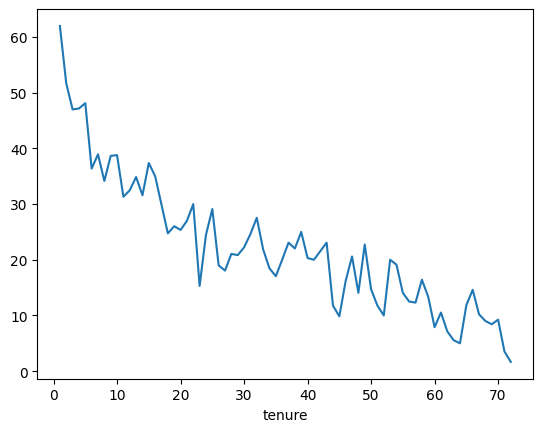

In [134]:
churn_rate.transpose()['customerID'].plot()

На основе данных tenure создадим новую колонку для категорий от 0 до 12 месяцев, от 12 до 24 месяцнв, от 24 до 48 меясцев и более 48 месяцев.

Создадим функцию:

In [135]:
def cohort(tenure):
    if tenure <= 12:
        return '0-12 месяцев'
    elif tenure <= 24:
        return '12-24 месяцев'
    elif tenure <= 48:
        return '24-48 месяцев'
    else:
        return 'больше 48 месяцев'

In [136]:
df['tenure'].apply(cohort)

0            0-12 месяцев
1           24-48 месяцев
2            0-12 месяцев
3           24-48 месяцев
4            0-12 месяцев
              ...        
7027        12-24 месяцев
7028    больше 48 месяцев
7029         0-12 месяцев
7030         0-12 месяцев
7031    больше 48 месяцев
Name: tenure, Length: 7032, dtype: object

In [137]:
df['Tenure cohort'] = df['tenure'].apply(cohort)

Изучим полученные данные 

In [138]:
df[['Tenure cohort', 'tenure']]

Tenure cohort  tenure
0          0-12 месяцев       1
1         24-48 месяцев      34
2          0-12 месяцев       2
3         24-48 месяцев      45
4          0-12 месяцев       2
...                 ...     ...
7027      12-24 месяцев      24
7028  больше 48 месяцев      72
7029       0-12 месяцев      11
7030       0-12 месяцев       4
7031  больше 48 месяцев      66

[7032 rows x 2 columns]

<Axes: xlabel='MonthlyCharges', ylabel='TotalCharges'>

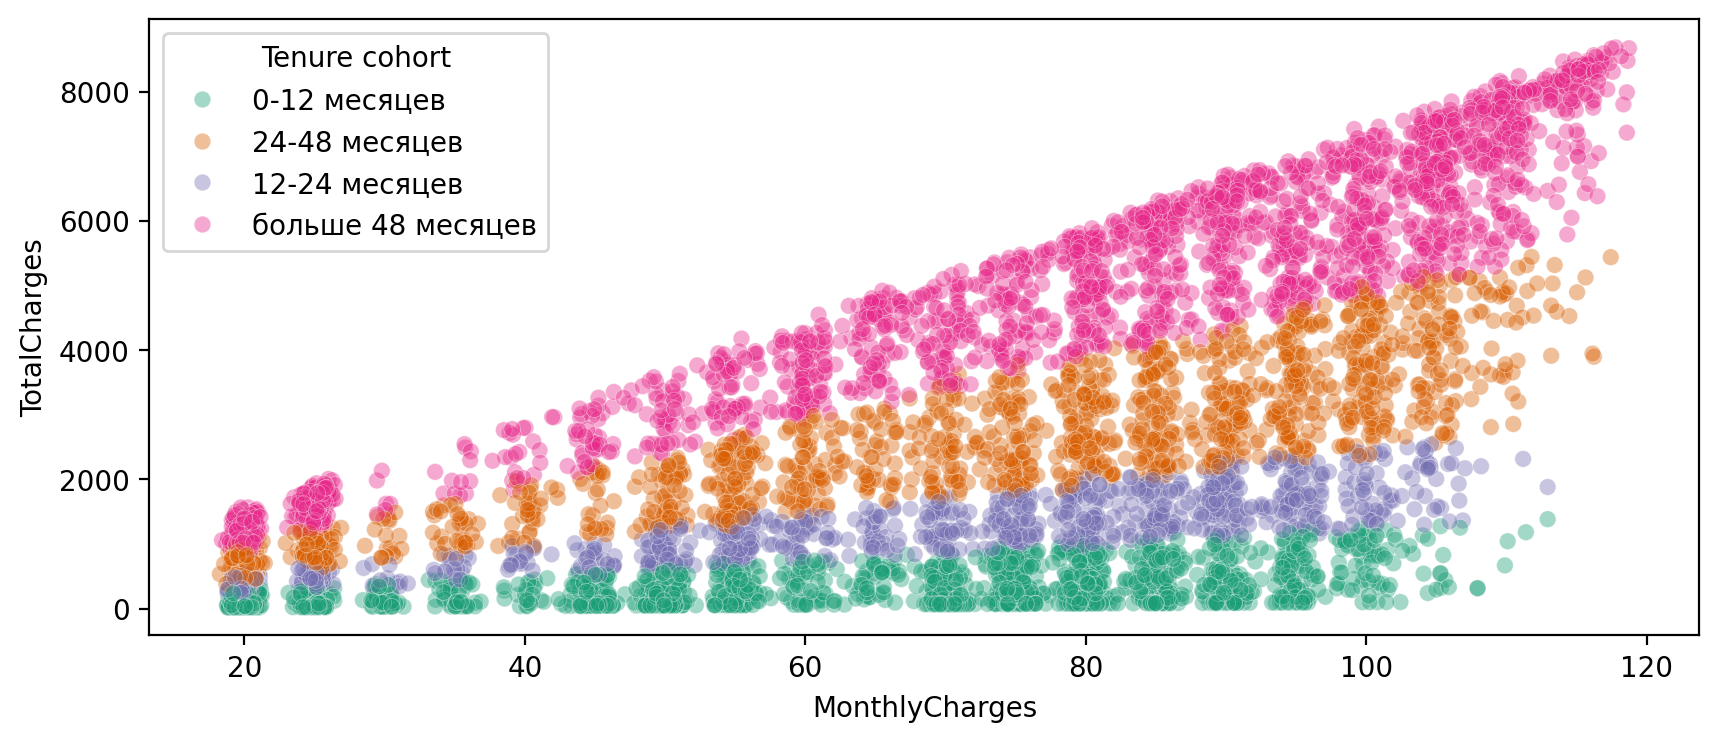

In [139]:
plt.figure(figsize=(10, 4), dpi=200)
sns.scatterplot(data=df, x='MonthlyCharges', y='TotalCharges', hue='Tenure cohort', 
                alpha=0.4, lw=0.3, palette='Dark2')

Чем дольше человек абонент компании, тем больше его траты.

Посчитаем отток для отдельных когорт

<Axes: xlabel='Tenure cohort', ylabel='count'>

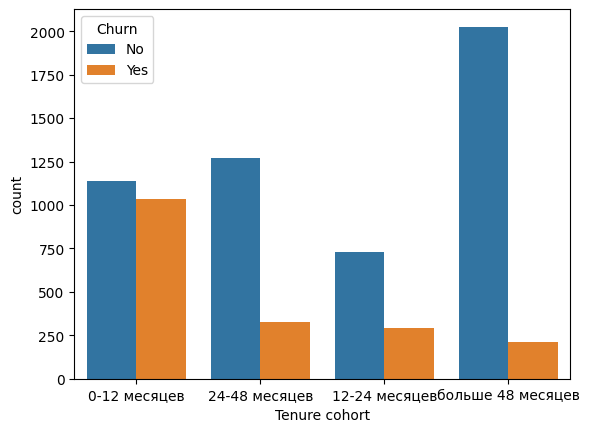

In [140]:
sns.countplot(data=df, x='Tenure cohort', hue='Churn')

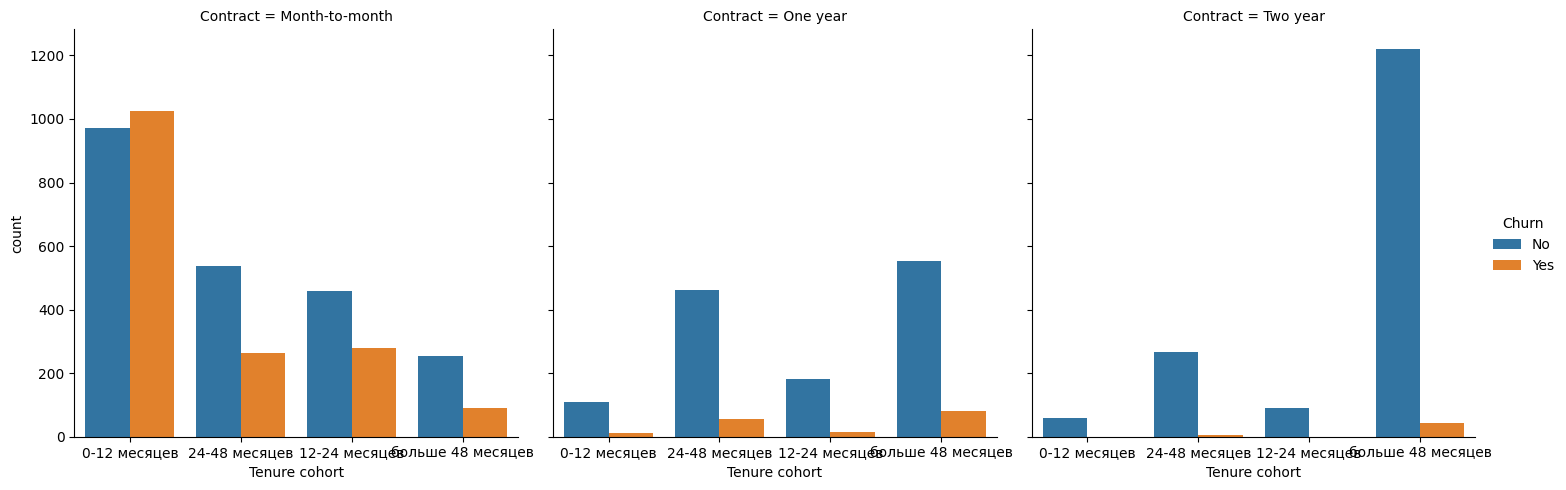

In [141]:
sns.catplot(data=df, x='Tenure cohort', hue='Churn', kind='count', col='Contract')

Наиболее меньший отток у контрактов 1 год и более.

# Далее мы исследуем 4 модели на основе деревьев: одно дерево решений, случайный лес, адаптивный бустинг и градиентный бустинг.

**Decision Tree (дерево решений)**

In [142]:
df.head(3)

customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... TechSupport  \
0  No phone service             DSL             No  ...          No   
1                No             DSL            Yes  ...          No   
2                No             DSL            Yes  ...          No   

  StreamingTV StreamingMovies        Contract PaperlessBilling  \
0          No              No  Month-to-month              Yes   
1          No              No        One year               No   
2          No              No  Month-to-month              Yes   

      PaymentMethod MonthlyCharges TotalCharges  Churn  Tenure cohort  
0  Electronic check          29.85        29.85     No   0-12 месяцев  
1      Mailed check          56.95      1889.50     No  24-48 месяцев  
2      Mailed check          53.85       108.15    Yes   0-12 месяцев  

[3 rows x 22 columns]

Поскольку в датасете имеются текстовые данные, преобразуем их в дамми переменные. Сперва разделим данные на признаки и целевую переменную. Колонка CustomerID является первичным ключём и содержить уникальные значения и фактически дублирует колонку Index. Удалим ее.

In [143]:
X = df.drop(['customerID', 'Churn'], axis=1)
y = df['Churn']

In [144]:
X = pd.get_dummies(X, drop_first=True)  # удалим дублирующие колонки

In [145]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=101)

Далее создадим и обучим моедель дерева решений, оценим метрики, посмотрим на важность признаков, нарисуем график дерева.

In [146]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import ConfusionMatrixDisplay, classification_report

In [147]:
dt = DecisionTreeClassifier(max_depth=6)

In [148]:
dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=6)

In [149]:
preds = dt.predict(X_test)

In [150]:
print(classification_report(y_test, preds))

              precision    recall  f1-score   support

          No       0.87      0.89      0.88       557
         Yes       0.55      0.49      0.52       147

    accuracy                           0.81       704
   macro avg       0.71      0.69      0.70       704
weighted avg       0.80      0.81      0.81       704



Наша модель работает заметно лучше для класса No_churn (recall = 0,89), чем для класса Yes_churn (recall = 0,49). Данные не сбаллансированы - No_churn имеет больше данных, чем Yes_churn. Тем не менее результаты не хорошие.

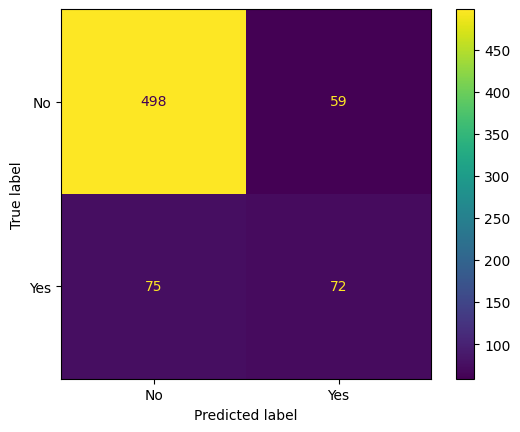

In [151]:
ConfusionMatrixDisplay.from_estimator(dt, X_test, y_test)
plt.show()

Неправильно классифицировано 75 абонентов (они уходят в отток, но модель считает, что нет).И 59 абонентов не ходят, а модель считает, что уходят с отток. При этом, наиболее важно минимизировать тех, кого модель ошибочно считает оставшимися, а аони на самом деле ушли в отток (75).

Посмотрим на наиболее важные признаки

In [152]:
imp_feats = pd.DataFrame(data=dt.feature_importances_, index=X.columns, columns=['важность'])

In [153]:
imp_feats = imp_feats.sort_values('важность')

In [154]:
imp_feats

важность
Dependents_Yes                         0.000000
Partner_Yes                            0.000000
OnlineSecurity_No internet service     0.000000
InternetService_No                     0.000000
PaymentMethod_Mailed check             0.000000
Tenure cohort_12-24 месяцев            0.000000
PaperlessBilling_Yes                   0.000000
Tenure cohort_24-48 месяцев            0.000000
PaymentMethod_Credit card (automatic)  0.000000
StreamingMovies_Yes                    0.000000
StreamingTV_Yes                        0.000000
StreamingMovies_No internet service    0.000000
StreamingTV_No internet service        0.000000
TechSupport_No internet service        0.000000
DeviceProtection_Yes                   0.000000
DeviceProtection_No internet service   0.000000
Tenure cohort_больше 48 месяцев        0.000000
PhoneService_Yes                       0.000890
gender_Male                            0.001237
OnlineBackup_Yes                       0.005341
MultipleLines_No phone service         0.006962
TechSupport_Yes                        0.007868
OnlineSecurity_Yes                     0.008376
Contract_One year                      0.010021
SeniorCitizen                          0.010825
MultipleLines_Yes                      0.012432
OnlineBackup_No internet service       0.026290
Contract_Two year                      0.027065
PaymentMethod_Electronic check         0.034436
MonthlyCharges                         0.047970
TotalCharges                           0.062313
InternetService_Fiber optic            0.314060
tenure                                 0.423914

Уберем нули

In [155]:
imp_feats = imp_feats[imp_feats['важность'] > 0]

In [156]:
imp_feats

важность
PhoneService_Yes                  0.000890
gender_Male                       0.001237
OnlineBackup_Yes                  0.005341
MultipleLines_No phone service    0.006962
TechSupport_Yes                   0.007868
OnlineSecurity_Yes                0.008376
Contract_One year                 0.010021
SeniorCitizen                     0.010825
MultipleLines_Yes                 0.012432
OnlineBackup_No internet service  0.026290
Contract_Two year                 0.027065
PaymentMethod_Electronic check    0.034436
MonthlyCharges                    0.047970
TotalCharges                      0.062313
InternetService_Fiber optic       0.314060
tenure                            0.423914

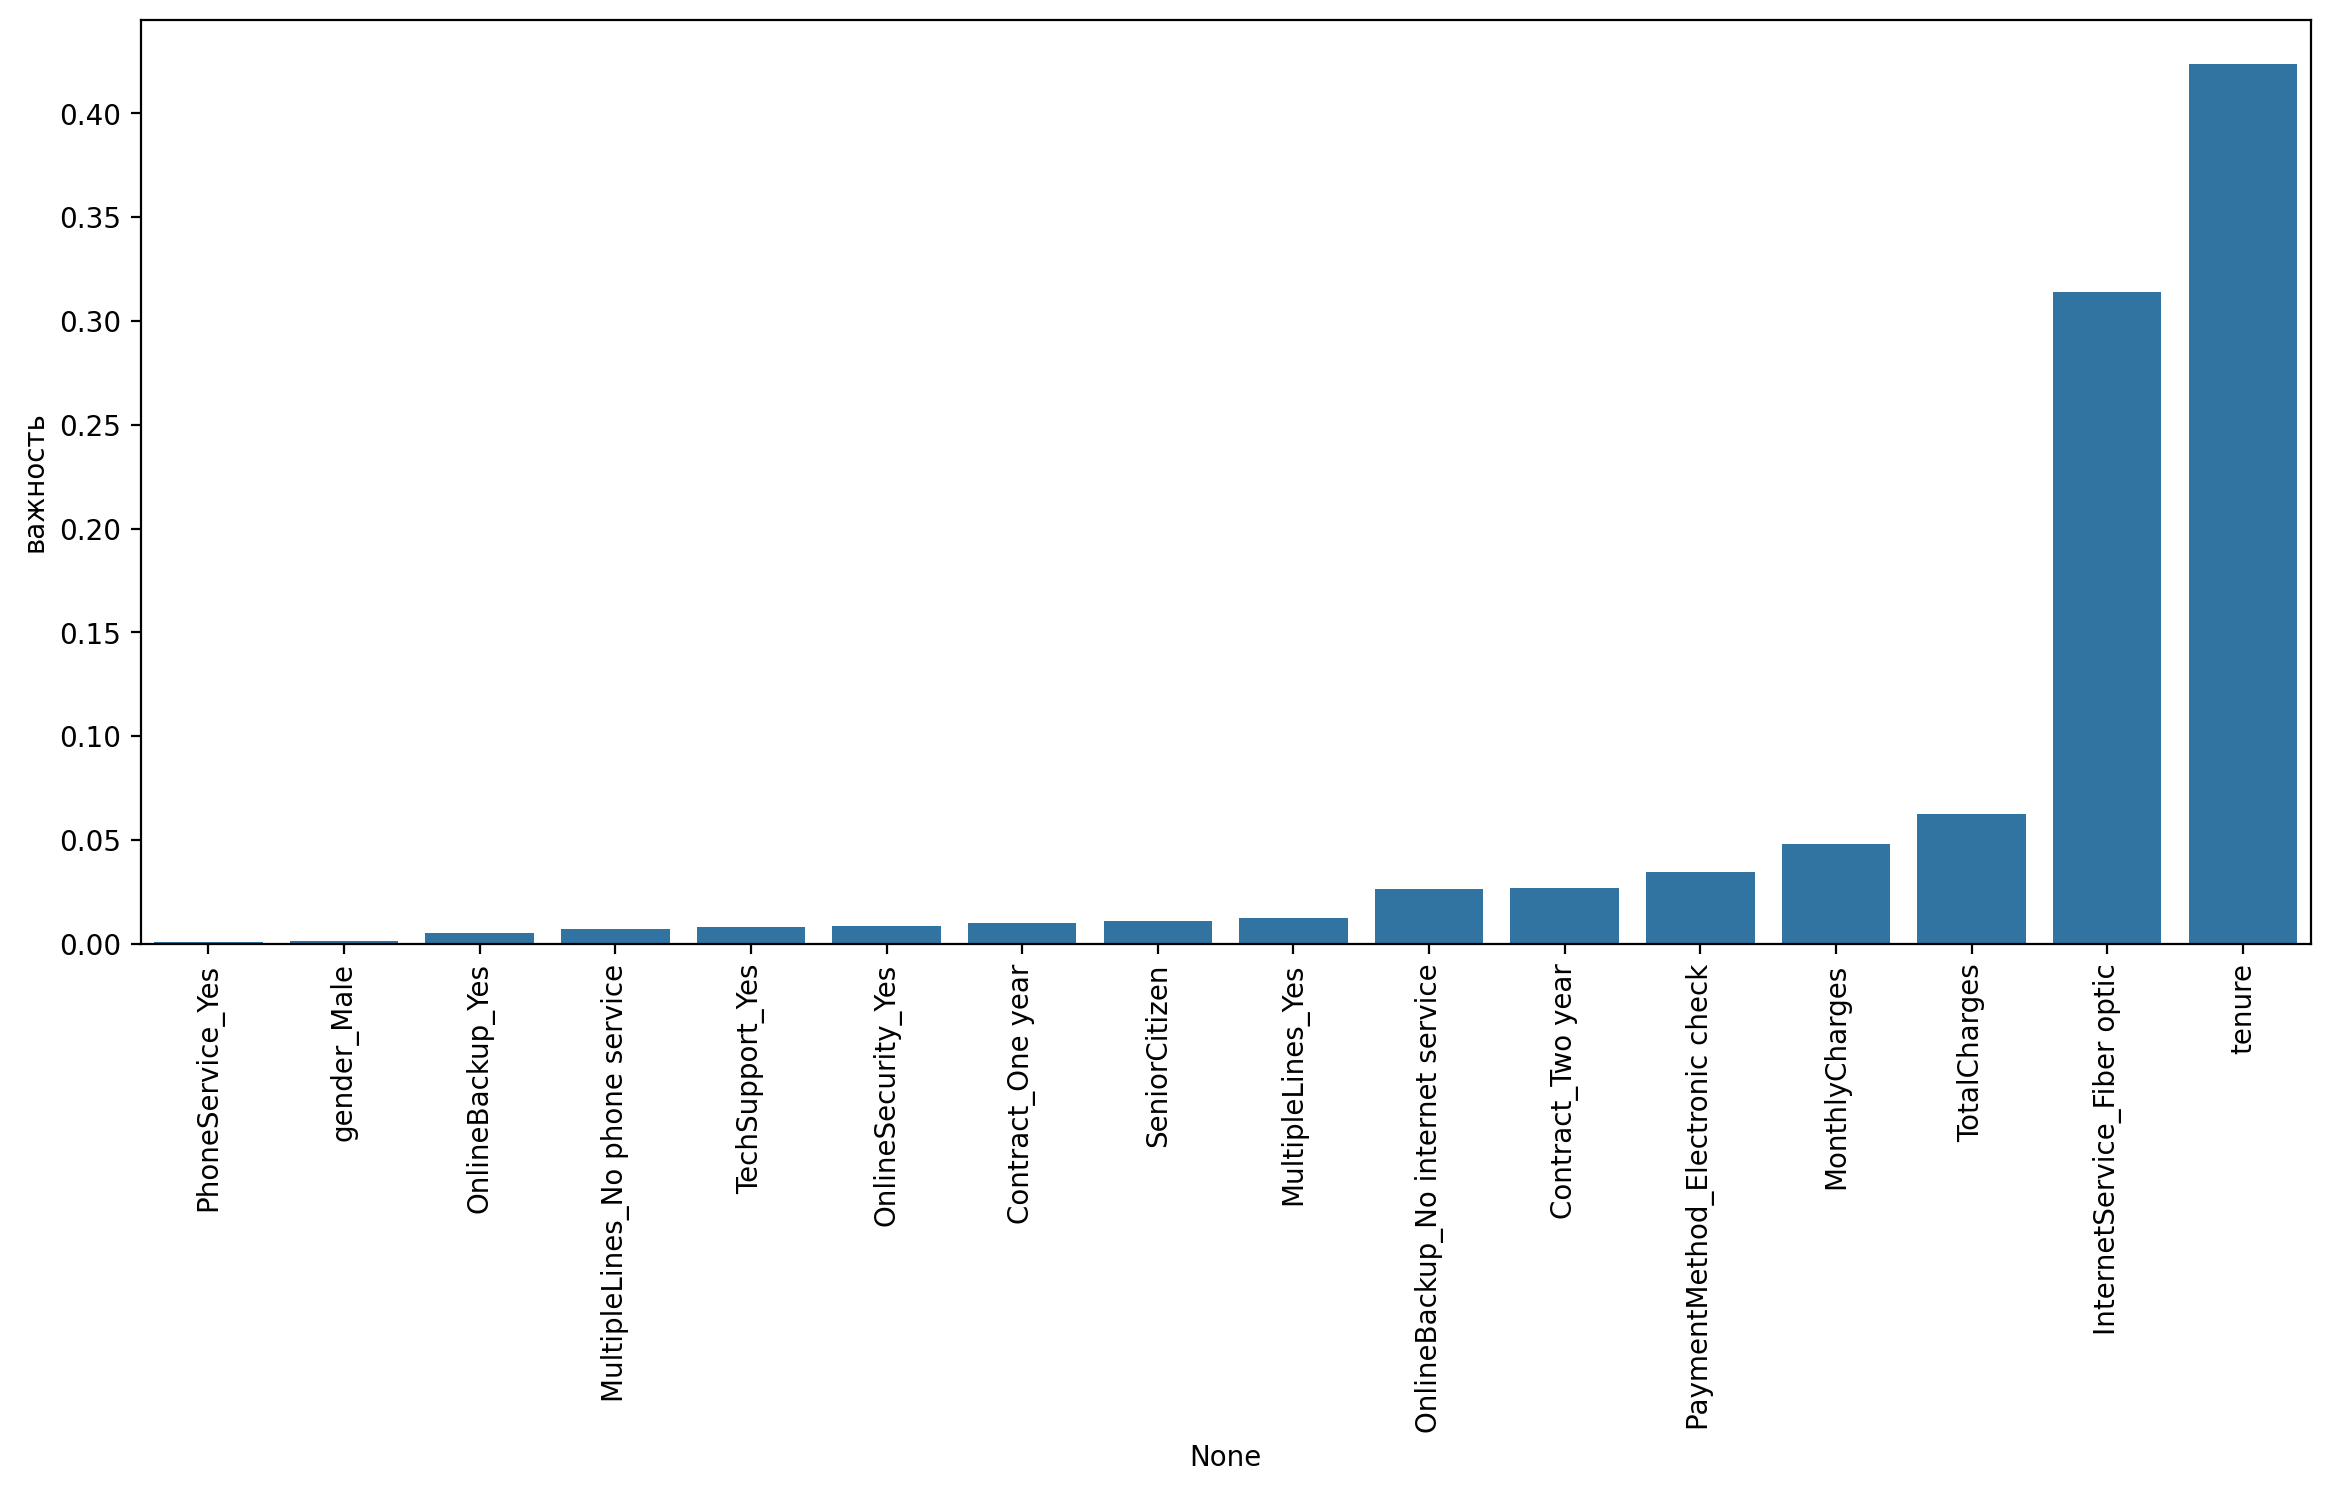

In [157]:
plt.figure(figsize=(14, 6), dpi=200)
sns.barplot(data=imp_feats, x=imp_feats.index, y='важность')
plt.xticks(rotation=90);

С точки зрения этой модели наиболее важные признаки - это tenure (хорошо крппелирует в целевой переменной) и InternetService_Fiber optic (оптоволоконный интернет). Признак tenure мы уже рассмотрели ранее, а InternetService_Fiber optic нужно выяснять причины у провайдера. Почему люди, полузьющиеся оптоволокном уходят в отток?

In [158]:
from sklearn.tree import plot_tree

[Text(0.48522727272727273, 0.9285714285714286, 'x[1] <= 17.5\ngini = 0.396\nsamples = 6328\nvalue = [4606.0, 1722.0]'),
 Text(0.2375, 0.7857142857142857, 'x[10] <= 0.5\ngini = 0.497\nsamples = 2387\nvalue = [1287, 1100]'),
 Text(0.36136363636363633, 0.8571428571428572, 'True  '),
 Text(0.1340909090909091, 0.6428571428571429, 'x[1] <= 5.5\ngini = 0.412\nsamples = 1343\nvalue = [954, 389]'),
 Text(0.07272727272727272, 0.5, 'x[14] <= 0.5\ngini = 0.482\nsamples = 696\nvalue = [414, 282]'),
 Text(0.03636363636363636, 0.35714285714285715, 'x[0] <= 0.5\ngini = 0.5\nsamples = 421\nvalue = [207, 214]'),
 Text(0.01818181818181818, 0.21428571428571427, 'x[2] <= 55.225\ngini = 0.499\nsamples = 370\nvalue = [194, 176]'),
 Text(0.00909090909090909, 0.07142857142857142, 'gini = 0.5\nsamples = 298\nvalue = [145, 153]'),
 Text(0.02727272727272727, 0.07142857142857142, 'gini = 0.435\nsamples = 72\nvalue = [49, 23]'),
 Text(0.05454545454545454, 0.21428571428571427, 'x[2] <= 29.175\ngini = 0.38\nsamples =

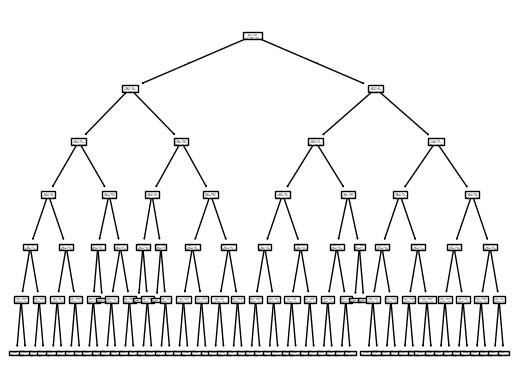

In [159]:
plot_tree(dt)

**Построим модель случайного леса (Random Forest)**

In [160]:
from sklearn.ensemble import RandomForestClassifier

In [161]:
rf = RandomForestClassifier()

In [162]:
rf.fit(X_train, y_train)

RandomForestClassifier()

In [163]:
preds = rf.predict(X_test)

In [164]:
print(classification_report(y_test, preds))

              precision    recall  f1-score   support

          No       0.86      0.88      0.87       557
         Yes       0.50      0.45      0.47       147

    accuracy                           0.79       704
   macro avg       0.68      0.67      0.67       704
weighted avg       0.78      0.79      0.79       704



Эта модель работает хуже, чем дерево решений. Результаты плохие. Попробуем ограничить глубину деревьев.

In [165]:
rf = RandomForestClassifier(max_depth=6)
rf.fit(X_train, y_train)
preds = rf.predict(X_test)

In [166]:
print(classification_report(y_test, preds))

              precision    recall  f1-score   support

          No       0.87      0.92      0.89       557
         Yes       0.61      0.48      0.54       147

    accuracy                           0.83       704
   macro avg       0.74      0.70      0.72       704
weighted avg       0.82      0.83      0.82       704



Результаты улучшились, но всё еще не очень хорошие.

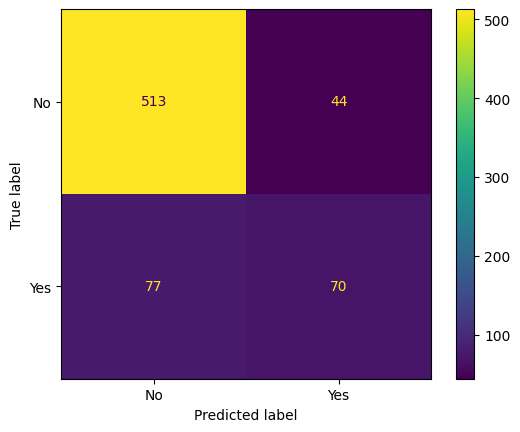

In [167]:
ConfusionMatrixDisplay.from_estimator(rf, X_test, y_test)
plt.show()

Несмотря на метрики мы не смогли минимизировать метрику recall (81). Она увеличилась с 75 до 81.

**Модель расширяемых деревьев (Boosted Trees)**

In [168]:
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier

In [169]:
ada_model = AdaBoostClassifier()
gb_model = GradientBoostingClassifier()

In [170]:
ada_model.fit(X_train, y_train)

c:\Users\mmd28\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


AdaBoostClassifier()

In [171]:
gb_model.fit(X_train, y_train)

GradientBoostingClassifier()

In [172]:
ada_preds = ada_model.predict(X_test)
gb_preds = gb_model.predict(X_test)

In [173]:
print(classification_report(y_test, ada_preds))

              precision    recall  f1-score   support

          No       0.88      0.90      0.89       557
         Yes       0.60      0.54      0.57       147

    accuracy                           0.83       704
   macro avg       0.74      0.72      0.73       704
weighted avg       0.82      0.83      0.83       704



In [174]:
print(classification_report(y_test, gb_preds))

              precision    recall  f1-score   support

          No       0.87      0.90      0.89       557
         Yes       0.57      0.50      0.53       147

    accuracy                           0.82       704
   macro avg       0.72      0.70      0.71       704
weighted avg       0.81      0.82      0.81       704



Результаты двух моделей похожи. 

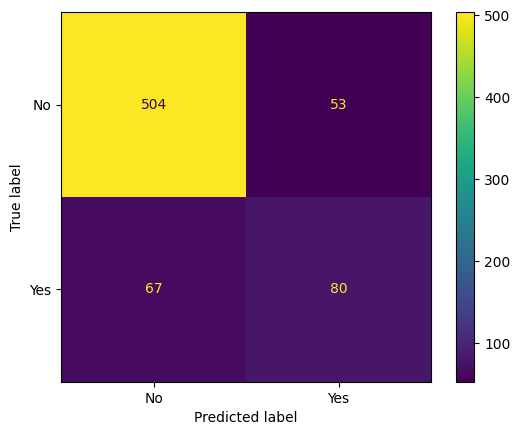

In [175]:
ConfusionMatrixDisplay.from_estimator(ada_model, X_test, y_test)
plt.show()

Модель AdaBoosting работает лучше других и ей удалось снизить значение с 75 до 67, но результаты всё-равно не хорошие. Попробуем поменять параметры модели.

In [176]:
ada_model = AdaBoostClassifier(n_estimators=70)

In [177]:
ada_model.fit(X_train, y_train)

c:\Users\mmd28\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


AdaBoostClassifier(n_estimators=70)

In [178]:
ada_preds = ada_model.predict(X_test)

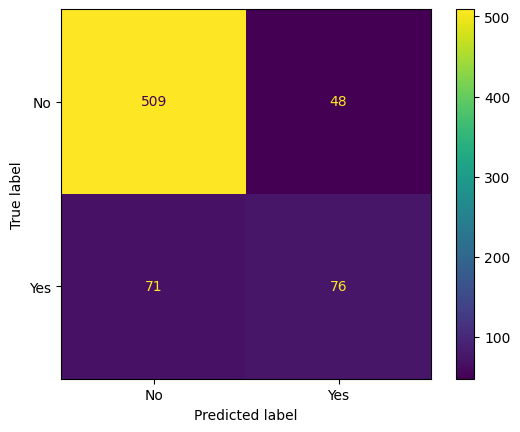

In [179]:
ConfusionMatrixDisplay.from_estimator(ada_model, X_test, y_test)
plt.show()

Результаты стали хуже с 70 и 100 деревьями. С 50 деревьями (значение по умолчанию) результаты были лучше всех.

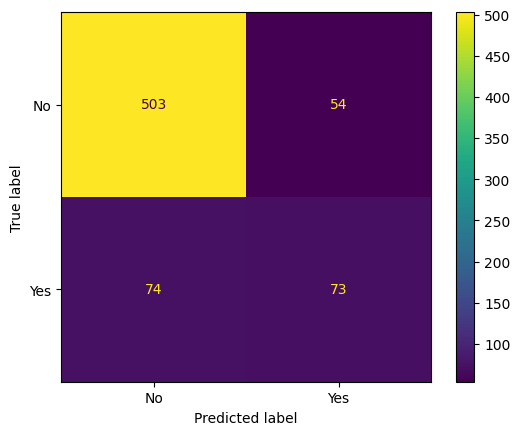

In [180]:
ConfusionMatrixDisplay.from_estimator(gb_model, X_test, y_test)
plt.show()

Наилучшей моделью оказался адаптивный бустинг с параметрами по умолчанию. 

В даннос задаче следует рассмотреть другие методы, например опорных векторов или логистическую регрессию или провести работу с данными совместно с экспертом (feature engineering)